# A collection of domains that spread unreliable information

**License**: You can use the code in this script according to a [CC0 1.0](https://creativecommons.org/publicdomain/zero/1.0/deed.en) license (no copyright).

The collection started on a list of sources referenced by [Galotti et al. 2020](https://www.nature.com/articles/s41562-020-00994-6#Sec4) and was since expanded with updated versions of the initial domain collections and extended by additional curated lists. A cleaned and de-duplicated list ist stored under ```data/clean```.

## Collection descriptions

The lists that are ingested and combined into a larger list below stem from several sources. Some of them fact-checking collectives, some of them individual scholars or journalists that collected and curated lists of domains that spread unreliable information. Snapshots of the lists that were taken on May 18th 2021 are stored under ```data/raw```. The table below lists the individual collections included in this meta-list:

| Author | Article | List source | Included | Lat update | Note | License |
| ------ | ------- | ----------- | -------- | ---------- | ---- | ------- |
| Melissa Zimdars | https://www.washingtonpost.com/posteverything/wp/2016/11/18/my-fake-news-list-went-viral-but-made-up-stories-are-only-part-of-the-problem/ | https://docs.google.com/document/d/10eA5-mCZLSS4MQY5QGb5ewC3VAL6pLkT53V_81ZyitM/preview | yes | 2016 | It is a bit unclear when this list was last updated | [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) |
Buzzfeed | https://www.buzzfeednews.com/article/craigsilverman/inside-the-partisan-fight-for-your-news-feed | https://github.com/BuzzFeedNews/2017-08-partisan-sites-and-facebook-pages/tree/master/data | yes | 2018-08-08 | | none specified |
Fake news watch | https://web.archive.org/web/20180213181029/http://www.fakenewswatch.com/ | https://web.archive.org/web/20180213181029/http://www.fakenewswatch.com/ | yes | 2016-01-18 | | none specified |
Politifact | https://www.politifact.com/article/2017/apr/20/politifacts-guide-fake-news-websites-and-what-they/ | https://e.infogr.am/politifacts_fake_news_almanac?parent_url=https%3A%2F%2Fwww.politifact.com%2Farticle%2F2017%2Fapr%2F20%2Fpolitifacts-guide-fake-news-websites-and-what-they%2F&src=embed# | yes | 2017-11-09 | | none specified |
Fletcher et al. | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europe | Is a compilation of individual smaller lists (Butac, Bufale, Bufalopedia and Décodex) in itself | see below | see below | several smaller lists, mainly focused on Italian and French misinformation spreading domains | see below |
Butac | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europ | https://www.butac.it/the-black-list/ | yes | 2021-05-18 | Mostly italian sites, domain names cleaned and expanded manually, facebook pages excluded | none specified |
Bufale | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europ | https://www.bufale.net/the-black-list-la-lista-nera-del-web/ | yes | 2018 | labels translated to English by italian native speaker | none specified |
Bufalopedia | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europ | https://bufalopedia.blogspot.com/p/siti-creatori-di-bufale.html | yes | 2020-05-05 | Mostly Italian sites, some international, changed label of “the onion” from fake news to satire. “Fake news” label reflects international sites | none specified |
Décodex | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europ | https://www.lemonde.fr/verification/ | no | unknown | French fact checking service from le Monde, no access established yet | |
Girnberg et al. | https://science.sciencemag.org/content/363/6425/374.abstract | https://github.com/LazerLab/twitter-fake-news-replication/blob/master/domains/domain_coding/data/black_sites.txt | yes | 2019-01-28 | | none specified |
Media bias fact check | https://mediabiasfactcheck.com/ | Various sub-sites with link lists | yes | 2021-05-21 | domains are labelled by the sub-site they appear on | none specified |
Snopes’ field guide to fake news sites | | https://www.snopes.com/news/2016/01/14/fake-news-sites/ | see below | 2016-01-14 | one of the sources of the CJR list | see below |
FakeNewsCodes | | http://www.fakenewscodex.com/ | see below | 2018-12-05 | one of the sources of the CJR list | see below |
FactCheck.org | | https://www.factcheck.org/2017/07/websites-post-fake-satirical-stories/ | see below | 2018-11-02 | one of the sources of the CJR list | see below |
Columbia Journalism review | https://www.cjr.org/fake-beta | https://www.cjr.org/fake-beta and more detailed data at https://docs.google.com/spreadsheets/d/1ck1_FZC-97uDLIlvRJDTrGqBk0FuDe9yHkluROgpGS8/edit#gid=2037798083 | yes | 2021-04 | Up-to-date compilation of lists from FactCheck.org, FakeNewsCodex, OpenSources, PolitiFact and Snopes. Entries with more than one label were expanded into several rows | none specified |

In [1]:
import pandas as pd
from os.path import join
import seaborn as sns
import re

import requests
import os
import json
import matplotlib.pyplot as plt

## Combine domain lists

### Read the raw data

In [11]:
src  = 'data/raw'

In [6]:
# source/author : latest update
sources = {'bufale':'2018',
           'bufalopedia':'2020-05-05',
           'butac':'2021-05-18',
           'buzzfeed':'2017-08-08',
           'columbia_journalism_review':'2021-04',
           'fake_news_watch':'2016-01-18',
           'girnberg':'2019-01-28',
           'media_bias_fact_check':'2021-05-17',
           'politifact':'2017-11-09',
           'zimdars':'2016'}

In [23]:
domain_list = pd.DataFrame()
for source, updated in sources.items():
    fname = '{}_{}.csv'.format(source, updated)
    tmp = pd.read_csv(join(src, fname), usecols=['url', 'label'])
    tmp['source'] = source
    tmp['last_update'] = updated
    domain_list = pd.concat([domain_list, tmp])
domain_list = domain_list.reset_index(drop=True)
domain_list.tail(3)

,url,label,source,last_update
6939,Zengardner.com,unknown,zimdars,2016
6940,zerohedge.com,conspiracy,zimdars,2016
6941,zootfeed.com,conspiracy,zimdars,2016


### Sanitize domains

In [24]:
def clean_url(url):
    # reformat entries that have the domain after a general name in parantheses
    if url.find('(') > 0:
        url = url.split('(')[-1]
        url = url.strip(')')
    # remove trailing slashes and spaces
    url = url.strip('/').strip()
    # transform all domains to lowercase
    url = url.lower()
    # remove spaces
    url = url.replace(' ', '')
    # if present: remove the protocol
    if url.startswith(("http", "https")):
        url = url.split('//')[1]
    # remove "www." 
    url = url.replace('www.', '')
    return url

In [25]:
# drop entries that do not list a domain name
N = len(domain_list)
domain_list = domain_list.dropna(subset=['url']).reset_index(drop=True)
print('dropped {} empty domain entries'.format(N - len(domain_list)))
# sanitize the remaining domains
domain_list['url'] = domain_list['url'].apply(clean_url)

dropped 2 empty domain entries


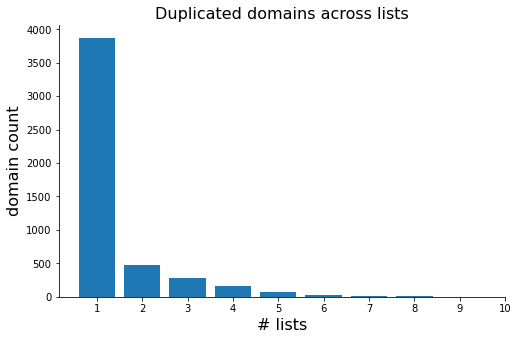

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))
list_count = domain_list['url'].value_counts()
ax.hist(list_count, rwidth=0.8, align='left',
        bins=range(1, list_count.max() + 1))
ax.set_ylabel('domain count', fontsize=16)
ax.set_xlabel('# lists', fontsize=16)
ax.set_xticks(range(1, list_count.max() + 1))
ax.set_title('Duplicated domains across lists', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Assign harm scores to labels

The following is based on the harm-score assignment to labels individually devised by [Galotti 2020 et al.](https://www.nature.com/articles/s41562-020-00994-6/tables/1), table 1, reproduced here: 

Category | Harm Score | Description | Type
---------|:----------:|-------------|:---:
Science | 1 | Domains providing content validated via scientific scrutiny. | Reliable
Mainstream media | 2 | Domains providing content that is generally subjected to professional fact checking and abides by the rules of media accountability. | Reliable
Satire | 3 | Domains providing content that is intentionally and explicitly aiming at providing a distorted representation of events as a form of humour and/or social critique. | Unreliable
Clickbait | 4 | Domains providing content that generally distorts or intentionally misrepresents information to capture attention. | Unreliable 
Political | 7 | Domains providing content that presents a partisan representation and interpretation of facts to support a political position over rival ones.
Fake or hoax | 8 | Domains providing manipulative and fabricated content with the purpose of misleading public opinion on socially relevant issues and provoking inflammatory responses. | Unreliable
Conspiracy and junk science | 9 | Domains providing systematically manipulative and fabricated content with the purpose of legitimizing implausible conceptualizations of facts and knowledge through argumentative methods that coarsely mimic those of scientific reasoning but without any sound logical or factual basis, targeting individuals or social groups as covert instigators or perpetrators of harmful actions. | Unreliable
Other | 5 | Domains pointing to general content that cannot be easily classified, such as videos on YouTube. | Unknown
Shadow | 6 | Domains related to URL shortening that cannot be classified a priori but would require further URL expansion. | Unknown

Since our combined list has a larger number of different labels, we need to expand on that mapping to include the labels not covered by the initial mapping. The extended mapping is given below:

In [28]:
label_map = {
    'pro science':1,
    'center right bias':2,
    'left center bias':2,
    'least biased':2,
    'reliable':2,
    'satire':3,
    'Parody site':3,
    'scandal hoax':4,
    'clickbait':4,
    'false satire':5,
    'Some fake stories':5,
    'some fake stories':5,
    'unreliable':5,    
    'political':5,
    'unknown':5,
    'state':5,
    'political disinformation':7,
    'religious and racial disinformation':7,
    'political and racial hoax':7,
    'pseudojournalism and politics':7,
    'left bias':7,
    'right bias':7,
    'bias':7,   
    'hate':7,
    'pseudojournalism blogs':7,
    'misleading':8,
    'fake news':8,
    'fake/hoax':8,
    'questionable sources':8,
    'Imposter site':8,
    'Fake news':8,
    'fake':8,
    'rumor':8,
    'fake':8,
    'close to Qanon':9,
    'pseudoscience':9,
    'pseudoscience blogs':9,
    'pseudomedicine':9,
    'conspiracy':9,
    'conspiracy blogs':9,
    'conspiracy/pseudoscience':9,
    'conspiracy':9,
    'junksci':9,
    'medical and scientific disinformation':9,
    'websites of conspiracy theorists and hoax spreaders':9,
    'social media sites of conspiracy theorists and hoax spreaders':9,
}

In [29]:
domain_list['harm_score'] = domain_list['label'].replace(label_map)

## De-duplication

### Drop hard duplicates

Drop domains that have the same harm score across all their source lists

In [30]:
print('{}/{} are hard duplicates'.format(\
    len(domain_list) - len(domain_list.drop_duplicates(subset=['url', 'harm_score'])), 
    len(domain_list)))

1230/6940 are hard duplicates


In [31]:
domain_list = domain_list.drop_duplicates(subset=['url', 'harm_score'])

### Drop soft duplicates, keep highest harm score

In [32]:
print('{}/{} are soft duplicates'.format(\
    len(domain_list) - len(domain_list['url'].unique()), 
    len(domain_list)))

813/5710 are soft duplicates


In [33]:
domain_counts = domain_list['url'].value_counts()
soft_duplicates = domain_counts[domain_counts > 1].index

In [34]:
for sd in soft_duplicates:
    sd_domains = domain_list[domain_list['url'] == sd]
    max_HS = sd_domains['harm_score'].max()
    entries_to_drop = sd_domains[sd_domains['harm_score'] < max_HS].index
    domain_list = domain_list.drop(entries_to_drop)
domain_list = domain_list.reset_index(drop=True)

In [35]:
# make sure that the list only contains unique domains now
assert len(domain_list) == len(domain_list['url'].unique())

In [36]:
print('there are {} unique domains left'.format(len(domain_list)))

there are 4897 unique domains left


In [40]:
domain_list.to_csv('data/clean/domain_list_clean.csv', index=False)

## Extract disinformation domains

Since this list now also includes some domains that are definitely not disinformation ("pro-science, satire"), and some ambiguous labels ("fake satire", "state", "unreliable"), we apply a broader classification, based on the harm score we assigned above. Here, we decide to rather classify a domain as "unknown" than "disinformation", if we are not sure how to classify. We therefore only assign domains with a harm score > 6 to the category "disinformation". 

In [37]:
harm_score_map = {
    1:'reliable',
    2:'reliable',
    3:'unknown',
    4:'unknown',
    5:'unknown',
    6:'unknown',
    7:'disinformation',
    8:'disinformation',
    9:'disinformation'
}

In [38]:
domain_list['type'] = domain_list['harm_score'].replace(harm_score_map)

In [39]:
domain_list['type'].value_counts()

disinformation    3036
reliable          1489
unknown            372
Name: type, dtype: int64

In [41]:
domain_list[domain_list['type'] == 'disinformation'].to_csv(\
        'data/clean/disinformation_domains_clean.csv', index=False)